In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# Preparing the data
Before we build our model using machine learning algorithms, let's prepare our dataset. We will go through the following stages:

1. Importing the data
2. Selecting the feature matrix X and the target column y (supervised learning)
3. Encoding categorical features
4. Scaling numeric features
5. Splitting the whole dataset into training and testing datasets

In [2]:
# loading the dataset into a pandas dataframe
url = '/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)

In [3]:
# displays five random rows in the DataFrame 
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
630,22,No,Travel_Rarely,1230,Research & Development,1,2,Life Sciences,1,872,...,1,80,2,4,2,1,2,2,2,2
1304,40,No,Travel_Rarely,750,Research & Development,12,3,Life Sciences,1,1829,...,2,80,1,15,3,3,7,4,7,7
281,42,No,Travel_Rarely,635,Sales,1,1,Life Sciences,1,387,...,3,80,0,20,3,3,20,16,11,6
542,38,No,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,743,...,4,80,0,10,4,4,1,0,0,0
887,42,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,1242,...,3,80,0,20,6,3,1,0,0,0


In [4]:
# displays column name, datatypes, non-null values count and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# separating the features into categorical and numerical 

In [6]:
# categorical features
category = ['RelationshipSatisfaction','PerformanceRating','OverTime','Over18','MaritalStatus','JobRole','Gender','EducationField',
           'Department','BusinessTravel','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','Attrition']

In [7]:
df_cat = df[category]
df_cat.head()

,RelationshipSatisfaction,PerformanceRating,OverTime,Over18,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,Attrition
0,1,3,Yes,Y,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,2,2,3,4,1,Yes
1,4,4,No,Y,Married,Research Scientist,Male,Life Sciences,Research & Development,Travel_Frequently,1,3,2,2,3,No
2,2,3,Yes,Y,Single,Laboratory Technician,Male,Other,Research & Development,Travel_Rarely,2,4,2,3,3,Yes
3,3,3,Yes,Y,Married,Research Scientist,Female,Life Sciences,Research & Development,Travel_Frequently,4,4,3,3,3,No
4,4,3,No,Y,Married,Laboratory Technician,Male,Medical,Research & Development,Travel_Rarely,1,1,3,2,3,No


In [8]:
Education_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

EnvironmentSatisfaction_dict =  {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

JobInvolvement_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

JobSatisfaction_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

PerformanceRating_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

RelationshipSatisfaction_dict =  {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

WorkLifeBalance_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

In [9]:
df_cat['WorkLifeBalance'] = df_cat['WorkLifeBalance'].replace(WorkLifeBalance_dict).astype('category')
df_cat['Education'] = df_cat['Education'].replace(Education_dict).astype('category')
df_cat['EnvironmentSatisfaction'] = df_cat['EnvironmentSatisfaction'].replace(EnvironmentSatisfaction_dict).astype('category')
df_cat['JobInvolvement'] = df_cat['JobInvolvement'].replace(JobInvolvement_dict).astype('category')
df_cat['JobSatisfaction'] = df_cat['JobSatisfaction'].replace(JobSatisfaction_dict).astype('category')
df_cat['PerformanceRating'] = df_cat['PerformanceRating'].replace(PerformanceRating_dict).astype('category')
df_cat['RelationshipSatisfaction'] = df_cat['RelationshipSatisfaction'].replace(RelationshipSatisfaction_dict).astype('category')

/tmp/ipykernel_20/2779598049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['WorkLifeBalance'] = df_cat['WorkLifeBalance'].replace(WorkLifeBalance_dict).astype('category')
/tmp/ipykernel_20/2779598049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Education'] = df_cat['Education'].replace(Education_dict).astype('category')
/tmp/ipykernel_20/2779598049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [10]:
df_cat.head()

,RelationshipSatisfaction,PerformanceRating,OverTime,Over18,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,Attrition
0,Low,Excellent,Yes,Y,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,College,Medium,High,Very High,Bad,Yes
1,Very High,Outstanding,No,Y,Married,Research Scientist,Male,Life Sciences,Research & Development,Travel_Frequently,Below College,High,Medium,Medium,Better,No
2,Medium,Excellent,Yes,Y,Single,Laboratory Technician,Male,Other,Research & Development,Travel_Rarely,College,Very High,Medium,High,Better,Yes
3,High,Excellent,Yes,Y,Married,Research Scientist,Female,Life Sciences,Research & Development,Travel_Frequently,Master,Very High,High,High,Better,No
4,Very High,Excellent,No,Y,Married,Laboratory Technician,Male,Medical,Research & Development,Travel_Rarely,Below College,Low,High,Medium,Better,No


In [11]:
# numerical features
df_num = df.select_dtypes('number')

In [12]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# these features are categorical so they will be droped from the DataFrame containing numeric features
df_num.drop(columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
                      'RelationshipSatisfaction','WorkLifeBalance'], inplace=True)

In [14]:
df_num.shape

(1470, 19)

In [15]:
df_cat.shape

(1470, 16)

In [16]:
df_cat.describe().T

,count,unique,top,freq
RelationshipSatisfaction,1470,4,High,459
PerformanceRating,1470,2,Excellent,1244
OverTime,1470,2,No,1054
Over18,1470,1,Y,1470
MaritalStatus,1470,3,Married,673
JobRole,1470,9,Sales Executive,326
Gender,1470,2,Male,882
EducationField,1470,6,Life Sciences,606
Department,1470,3,Research & Development,961
BusinessTravel,1470,3,Travel_Rarely,1043


In [17]:
# statistical summary of numerical features in the DataFrame
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


In [18]:
df2 = pd.concat([df_num,df_cat], axis=1)

In [19]:
df2.shape

(1470, 35)

In [20]:
df2.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,Gender,EducationField,Department,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,Attrition
0,41,1102,1,1,1,94,2,5993,19479,8,...,Female,Life Sciences,Sales,Travel_Rarely,College,Medium,High,Very High,Bad,Yes
1,49,279,8,1,2,61,2,5130,24907,1,...,Male,Life Sciences,Research & Development,Travel_Frequently,Below College,High,Medium,Medium,Better,No
2,37,1373,2,1,4,92,1,2090,2396,6,...,Male,Other,Research & Development,Travel_Rarely,College,Very High,Medium,High,Better,Yes
3,33,1392,3,1,5,56,1,2909,23159,1,...,Female,Life Sciences,Research & Development,Travel_Frequently,Master,Very High,High,High,Better,No
4,27,591,2,1,7,40,1,3468,16632,9,...,Male,Medical,Research & Development,Travel_Rarely,Below College,Low,High,Medium,Better,No


In [21]:
# dropping features that have only one value, these features will negatively affect model performance if not dropped
# features = 'Over18','EmployeeCount','StandardHours'
df3 = df2.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeNumber'])

In [22]:
df3.shape

(1470, 31)

In [23]:
df3.duplicated().sum()

0

# Exploratory Data Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_cat.describe().T

,count,unique,top,freq
RelationshipSatisfaction,1470,4,High,459
PerformanceRating,1470,2,Excellent,1244
OverTime,1470,2,No,1054
Over18,1470,1,Y,1470
MaritalStatus,1470,3,Married,673
JobRole,1470,9,Sales Executive,326
Gender,1470,2,Male,882
EducationField,1470,6,Life Sciences,606
Department,1470,3,Research & Development,961
BusinessTravel,1470,3,Travel_Rarely,1043


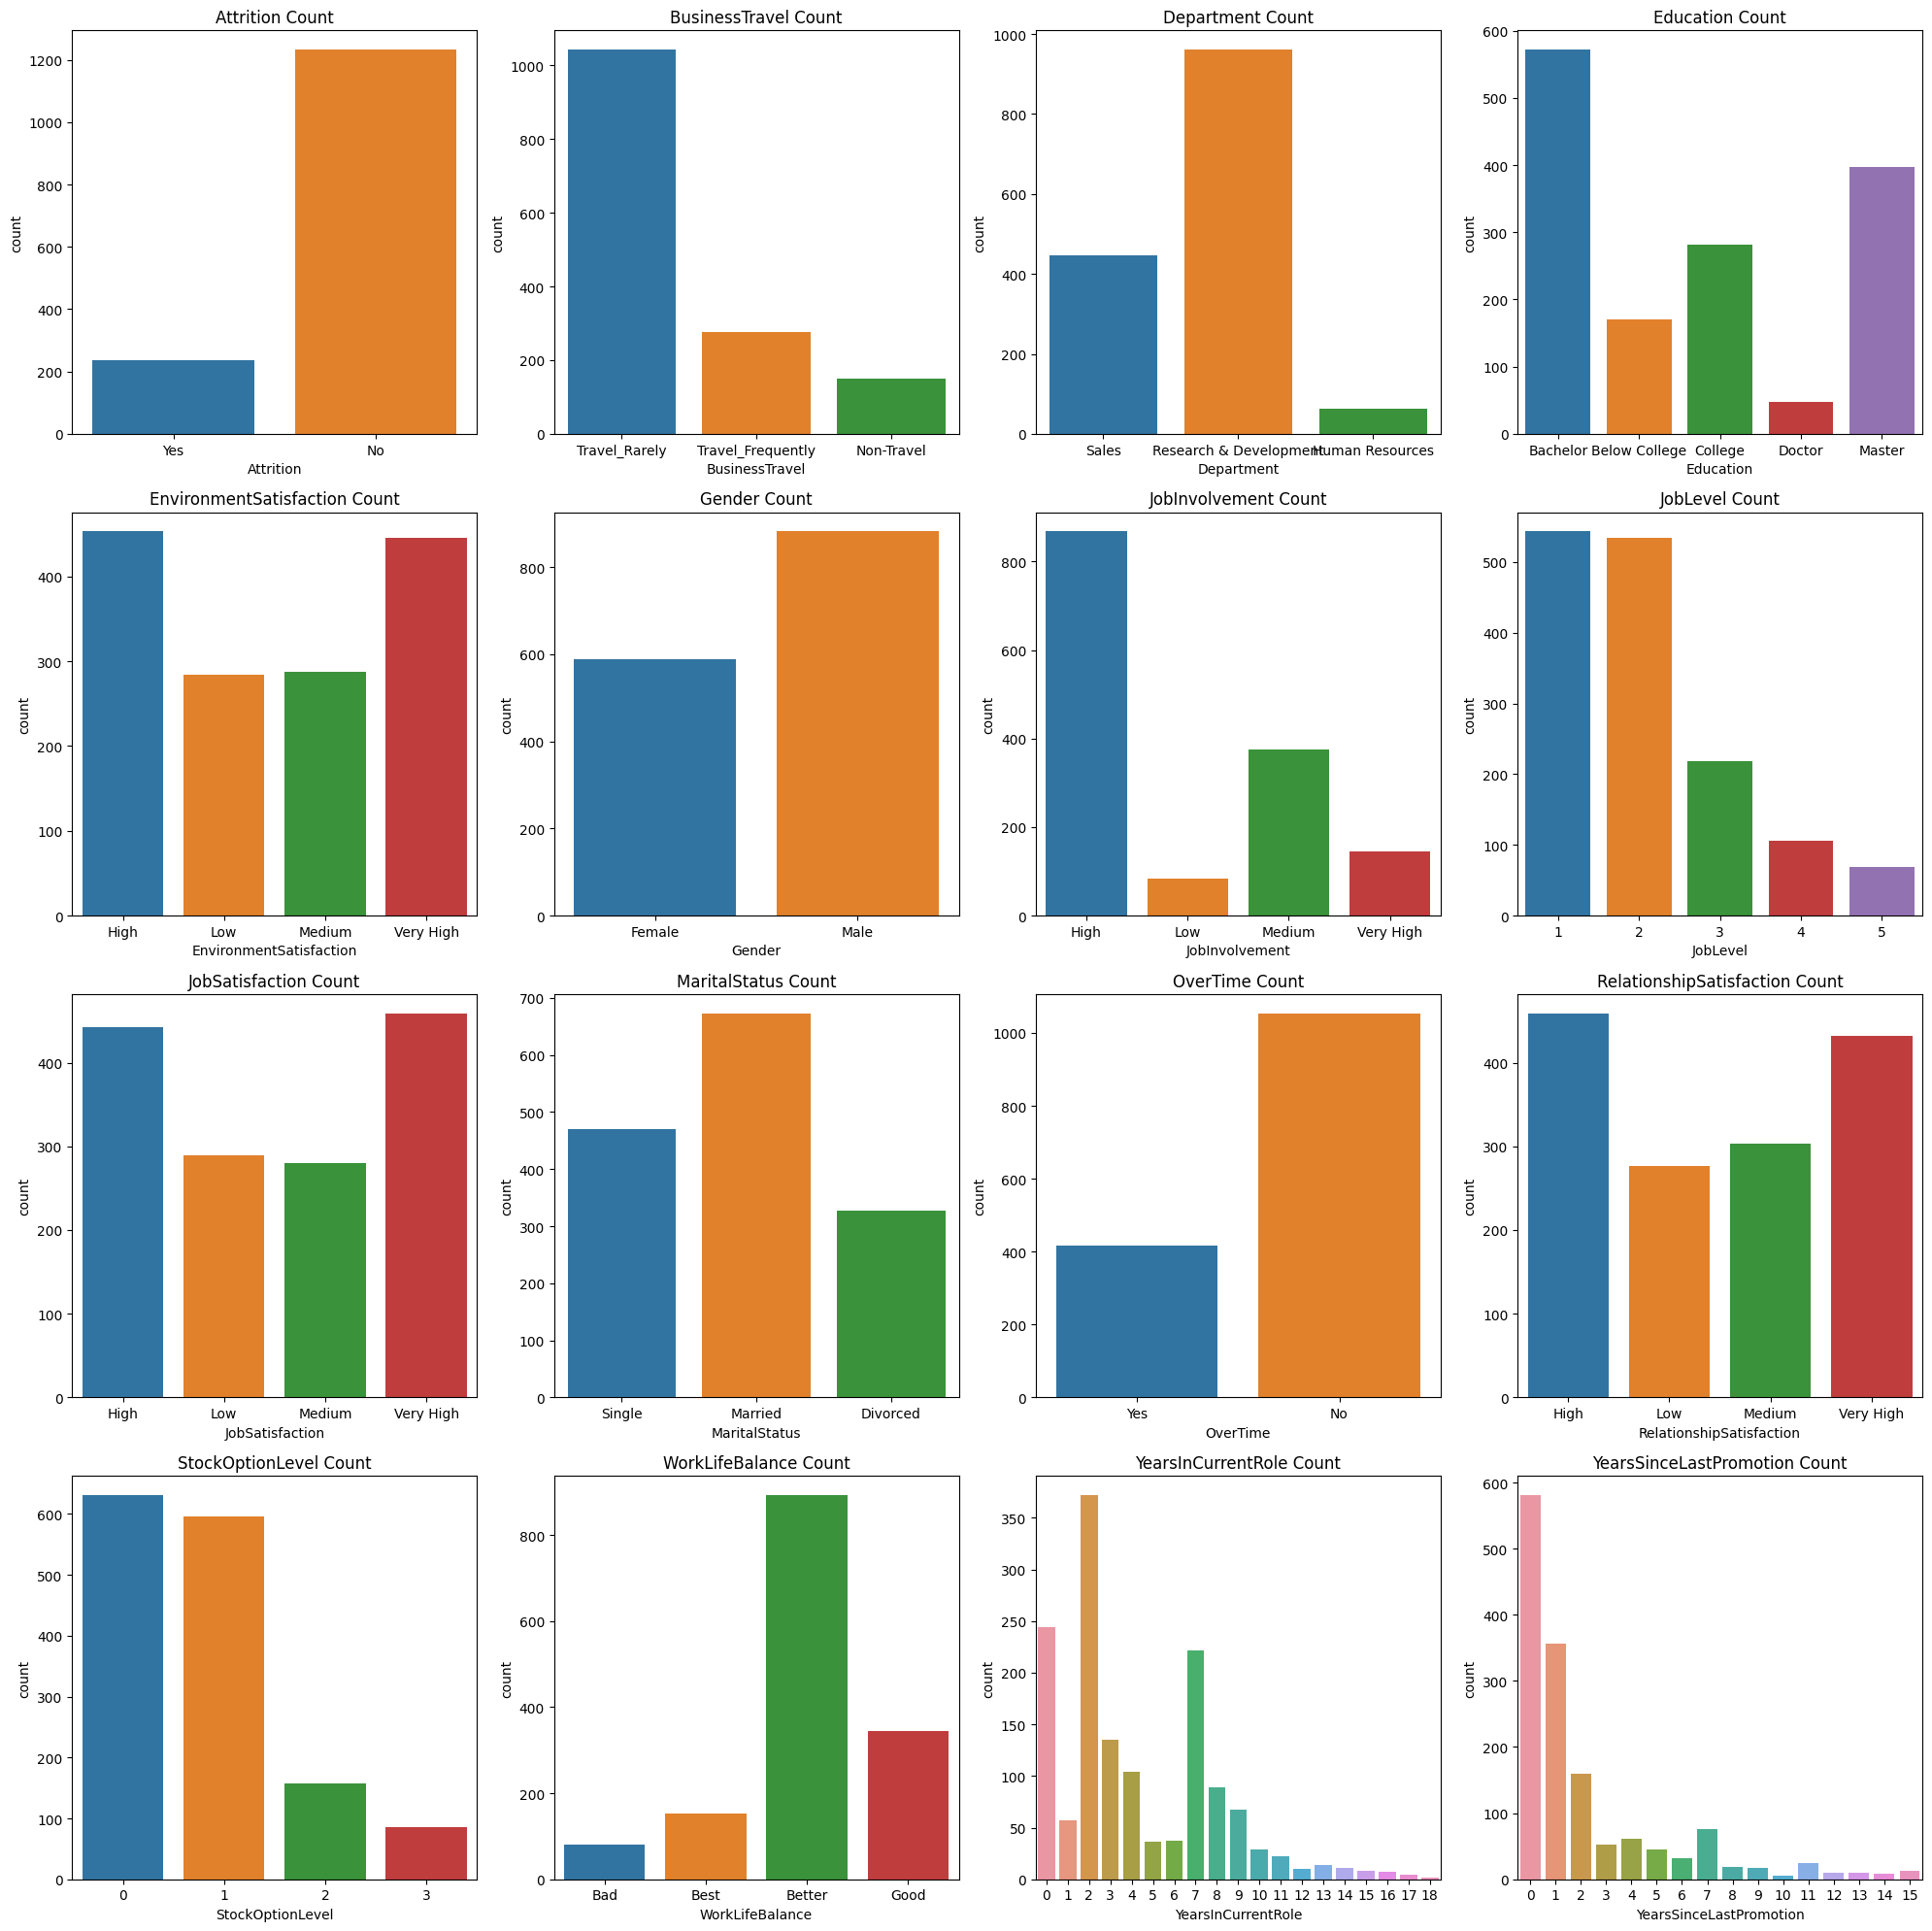

In [26]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

features = ['Attrition', 'BusinessTravel', 'Department', 'Education',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
            'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance','YearsInCurrentRole', 'YearsSinceLastPromotion']

# Plot each feature
for i, feature in enumerate(features):
    sns.countplot(data=df3, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature} Count')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='JobRole'>

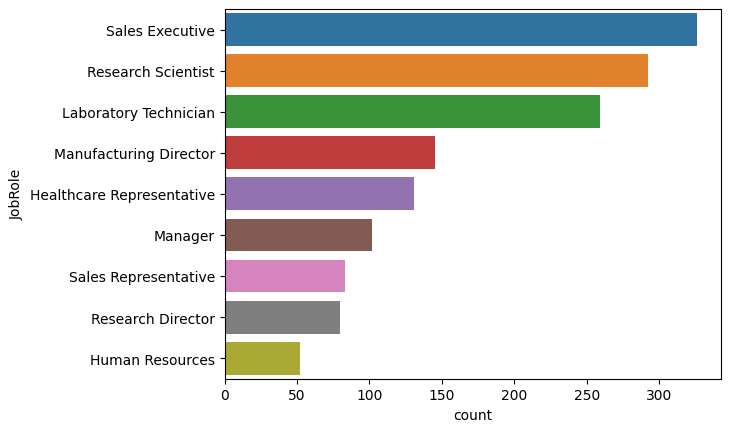

In [27]:
sns.countplot(data=df3, y='JobRole')

<Axes: xlabel='count', ylabel='EducationField'>

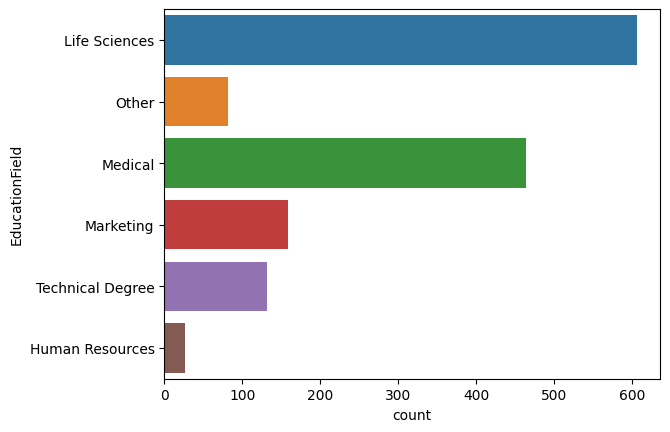

In [28]:
sns.countplot(data=df3, y='EducationField')

<Axes: xlabel='count', ylabel='Education'>

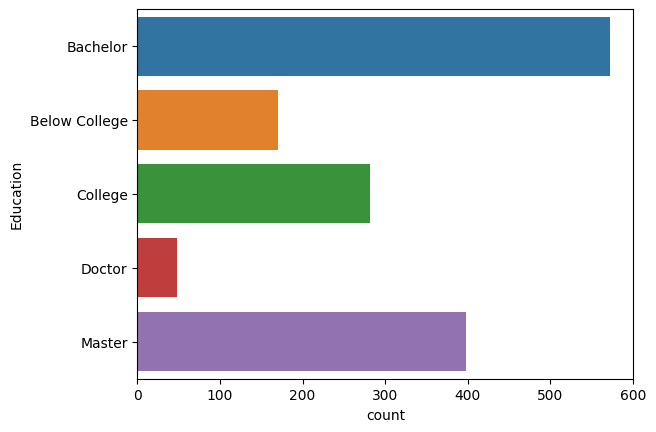

In [29]:
sns.countplot(data=df3, y='Education')

In [30]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   EmployeeCount            1470 non-null   int64
 4   EmployeeNumber           1470 non-null   int64
 5   HourlyRate               1470 non-null   int64
 6   JobLevel                 1470 non-null   int64
 7   MonthlyIncome            1470 non-null   int64
 8   MonthlyRate              1470 non-null   int64
 9   NumCompaniesWorked       1470 non-null   int64
 10  PercentSalaryHike        1470 non-null   int64
 11  StandardHours            1470 non-null   int64
 12  StockOptionLevel         1470 non-null   int64
 13  TotalWorkingYears        1470 non-null   int64
 14  TrainingTimesLastYear    1470 non-null   int64
 15  Year

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Density'>

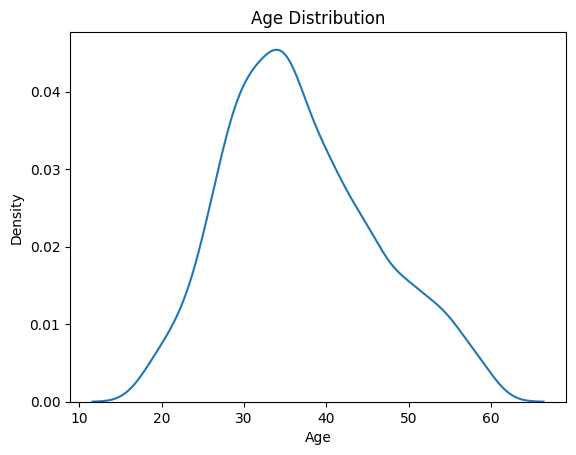

In [31]:
plt.title('Age Distribution')
sns.kdeplot(data=df3, x='Age')

<Axes: title={'center': 'Monthly income by Education'}, xlabel='Education', ylabel='MonthlyIncome'>

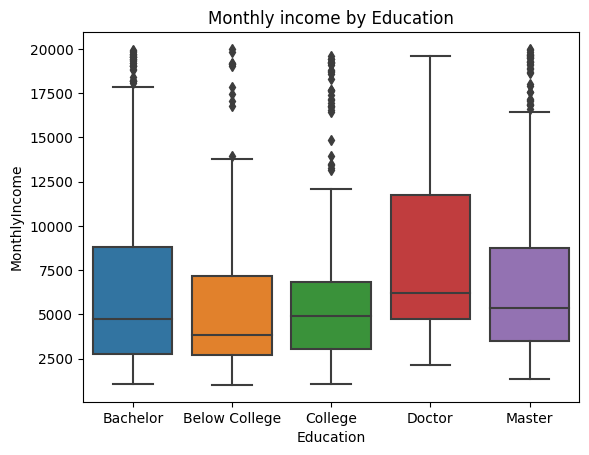

In [32]:
plt.title('Monthly income by Education')
sns.boxplot(data=df3, x='Education', y='MonthlyIncome')

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

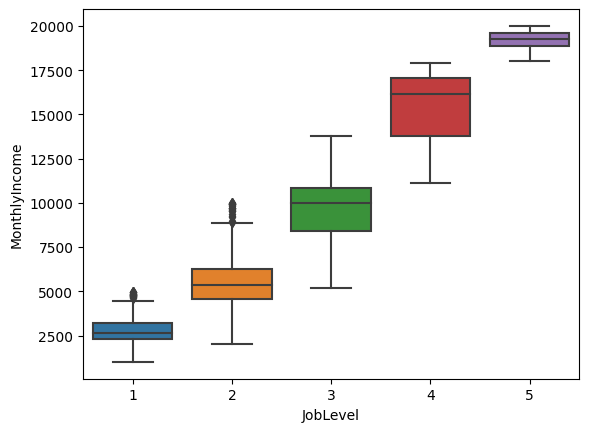

In [33]:
sns.boxplot(data=df3, x='JobLevel', y='MonthlyIncome')

The median monthly income increases by job level

<Axes: title={'center': 'Monthly Income by Job Role'}, xlabel='MonthlyIncome', ylabel='JobRole'>

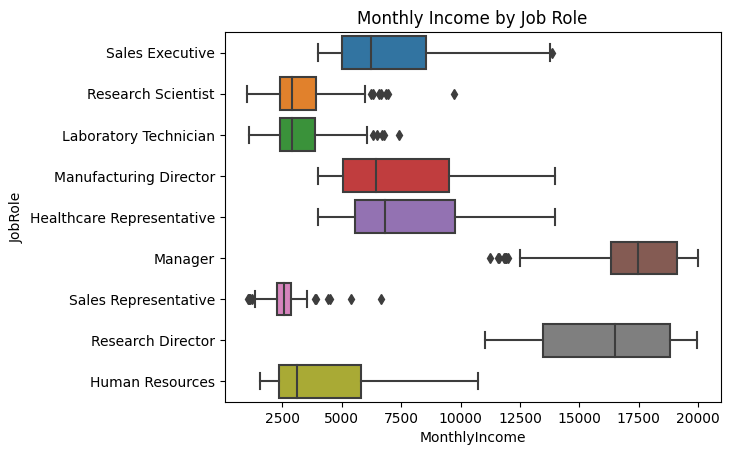

In [34]:
plt.title('Monthly Income by Job Role')
sns.boxplot(data=df3, x='MonthlyIncome', y='JobRole')

In [35]:
df3['Age'].max()

60

In [36]:
df3['Age'].isnull().sum()

0

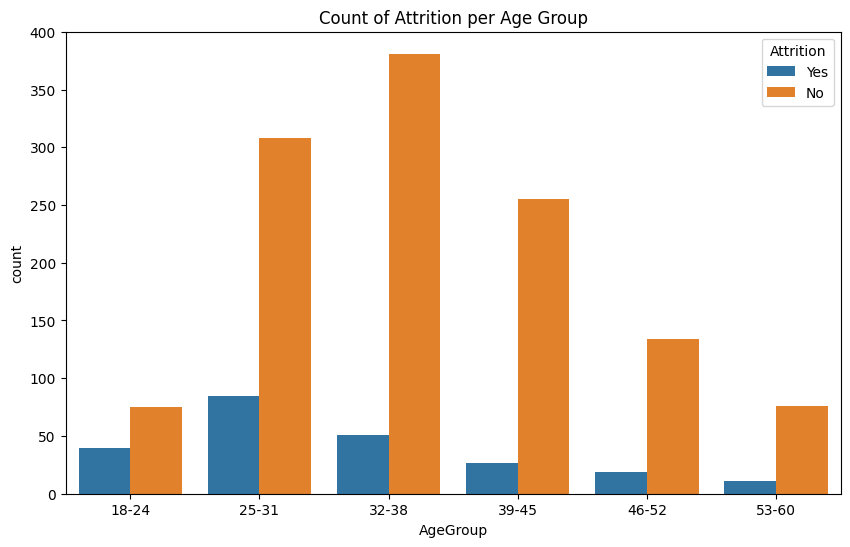

In [37]:
# Create bins for age
bins = [18, 25, 32, 39, 46, 53, 60]
labels = ['18-24', '25-31', '32-38', '39-45', '46-52', '53-60']
df3['AgeGroup'] = pd.cut(df3['Age'], bins=bins, labels=labels)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='AgeGroup', hue='Attrition')

# Display the plot
plt.title('Count of Attrition per Age Group')
plt.show()

In [38]:
df3['DistanceFromHome'].max() # 1-29

29

<Axes: xlabel='MaritalStatus', ylabel='count'>

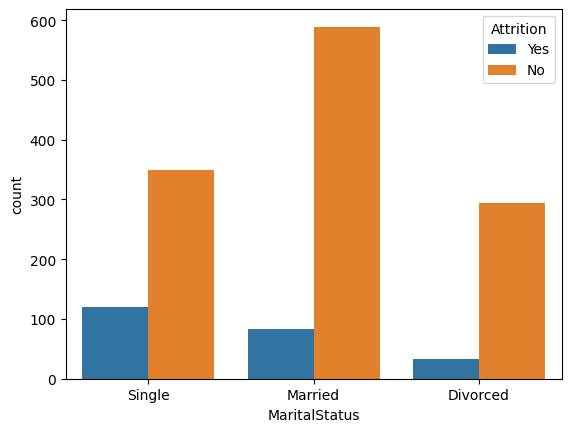

In [39]:
sns.countplot(data=df3, x='MaritalStatus', hue='Attrition')

<Axes: title={'center': 'Count of Attrition by Job Level'}, xlabel='JobLevel', ylabel='count'>

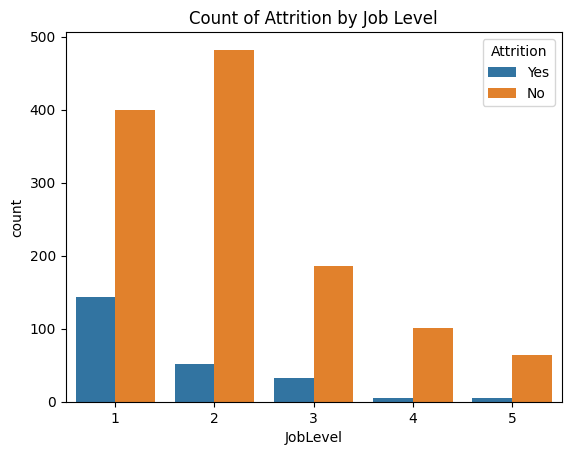

In [40]:
plt.title('Count of Attrition by Job Level')
sns.countplot(data=df3, x='JobLevel', hue='Attrition')

<Axes: title={'center': 'Count of Attrition by Gender'}, xlabel='Gender', ylabel='count'>

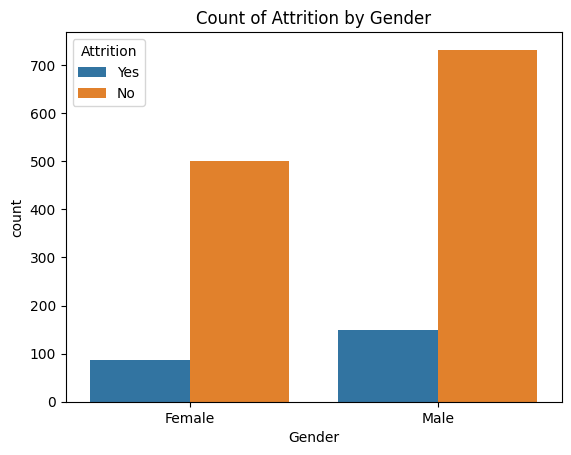

In [41]:
plt.title('Count of Attrition by Gender')
sns.countplot(data=df3, x='Gender', hue='Attrition')

<Axes: xlabel='JobSatisfaction', ylabel='count'>

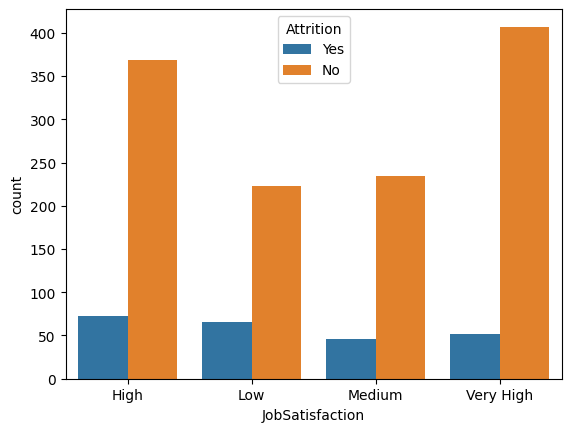

In [42]:
sns.countplot(data=df3, x='JobSatisfaction', hue='Attrition')

<Axes: xlabel='Department', ylabel='count'>

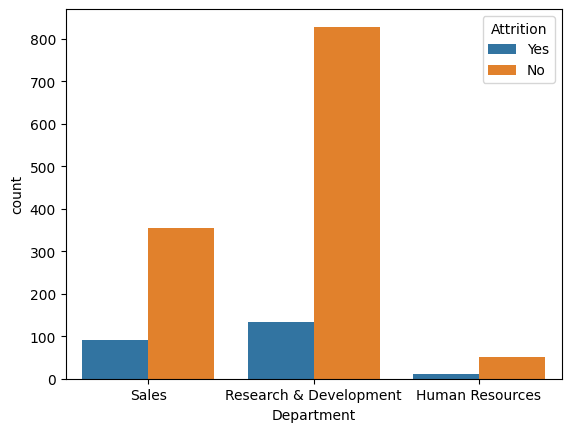

In [43]:
sns.countplot(data=df3, x='Department', hue='Attrition')

In [44]:
df4 = df3.copy()

In [45]:
dict = {'Yes':0, 'No':1}
df4['Attrition'] = df4['Attrition'].replace(dict)

In [46]:
X = df4.copy()
#y = X.pop('Attrition')

# Label encoding for categoricals
for colname in X.select_dtypes(include=['object','category']).columns:
    X[colname], _ = X[colname].factorize()

In [47]:
X

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EducationField,Department,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,Attrition,AgeGroup
0,41,1102,1,94,2,5993,19479,8,11,0,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,61,2,5130,24907,1,23,1,...,0,1,1,1,1,1,1,1,1,1
2,37,1373,2,92,1,2090,2396,6,15,0,...,1,1,0,0,2,1,2,1,0,2
3,33,1392,3,56,1,2909,23159,1,11,0,...,0,1,1,2,2,0,2,1,1,2
4,27,591,2,40,1,3468,16632,9,12,1,...,2,1,0,1,3,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,...,2,1,1,0,1,2,0,1,1,2
1466,39,613,6,42,3,9991,21457,4,15,1,...,2,1,0,1,2,1,3,1,1,2
1467,27,155,4,87,2,6142,5174,1,20,1,...,0,1,0,3,0,2,1,1,1,3
1468,49,1023,2,63,2,5390,13243,2,14,0,...,2,0,1,3,2,1,1,2,1,1


In [48]:
X.corr()['Attrition'].sort_values()

AgeGroup                   -0.145555
JobSatisfaction            -0.103348
EnvironmentSatisfaction    -0.079940
DistanceFromHome           -0.077924
EducationField             -0.075437
JobInvolvement             -0.071590
NumCompaniesWorked         -0.043494
Gender                     -0.029453
MonthlyRate                -0.015170
PerformanceRating          -0.002889
Education                  -0.001002
BusinessTravel              0.000074
HourlyRate                  0.006846
WorkLifeBalance             0.012169
PercentSalaryHike           0.013478
JobRole                     0.027930
YearsSinceLastPromotion     0.033019
RelationshipSatisfaction    0.037298
DailyRate                   0.056652
TrainingTimesLastYear       0.059478
Department                  0.063991
YearsAtCompany              0.134392
StockOptionLevel            0.137145
YearsWithCurrManager        0.156199
Age                         0.159205
MonthlyIncome               0.159840
YearsInCurrentRole          0.160545
M

In [49]:
#y = X.pop('Attrition')

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   HourlyRate                1470 non-null   int64
 4   JobLevel                  1470 non-null   int64
 5   MonthlyIncome             1470 non-null   int64
 6   MonthlyRate               1470 non-null   int64
 7   NumCompaniesWorked        1470 non-null   int64
 8   PercentSalaryHike         1470 non-null   int64
 9   StockOptionLevel          1470 non-null   int64
 10  TotalWorkingYears         1470 non-null   int64
 11  TrainingTimesLastYear     1470 non-null   int64
 12  YearsAtCompany            1470 non-null   int64
 13  YearsInCurrentRole        1470 non-null   int64
 14  YearsSinceLastPromotion   1470 non-null 

In [51]:
x = df4.copy()
y = x.pop('Attrition')

X = pd.get_dummies(data =x, columns=['RelationshipSatisfaction', 'PerformanceRating', 'OverTime',
       'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department',
       'BusinessTravel', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance','AgeGroup'])

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   DailyRate                           1470 non-null   int64
 2   DistanceFromHome                    1470 non-null   int64
 3   HourlyRate                          1470 non-null   int64
 4   JobLevel                            1470 non-null   int64
 5   MonthlyIncome                       1470 non-null   int64
 6   MonthlyRate                         1470 non-null   int64
 7   NumCompaniesWorked                  1470 non-null   int64
 8   PercentSalaryHike                   1470 non-null   int64
 9   StockOptionLevel                    1470 non-null   int64
 10  TotalWorkingYears                   1470 non-null   int64
 11  TrainingTimesLastYear               1470 non-null   int64
 12  YearsA

In [53]:
# calculating the mutual info of features in the DataFrame in relation to the 'SalePrice'
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

OverTime_No                        0.046351
AgeGroup_32-38                     0.041983
StockOptionLevel                   0.037115
PerformanceRating_Excellent        0.031395
BusinessTravel_Travel_Rarely       0.026937
JobRole_Sales Executive            0.022000
EducationField_Marketing           0.019750
YearsInCurrentRole                 0.015958
Age                                0.014998
JobSatisfaction_Very High          0.011721
HourlyRate                         0.008857
TotalWorkingYears                  0.007305
WorkLifeBalance_Bad                0.004647
AgeGroup_53-60                     0.000656
PercentSalaryHike                  0.000000
JobSatisfaction_High               0.000000
JobRole_Research Scientist         0.000000
JobRole_Manufacturing Director     0.000000
MonthlyRate                        0.000000
AgeGroup_46-52                     0.000000
EnvironmentSatisfaction_Medium     0.000000
EducationField_Technical Degree    0.000000
Department_Sales                

In [54]:
mi_scores

OverTime_No                     0.046351
MonthlyIncome                   0.044507
JobLevel                        0.043527
AgeGroup_32-38                  0.041983
JobSatisfaction_Low             0.037502
                                  ...   
Education_College               0.000000
Education_Doctor                0.000000
Education_Master                0.000000
EnvironmentSatisfaction_High    0.000000
TrainingTimesLastYear           0.000000
Name: MI Scores, Length: 77, dtype: float64

In [55]:
# scaling the numerical features using standardization
X_num = X.select_dtypes('number')

In [56]:
X_num = (X_num - X_num.mean())/ X_num.std()
# X_num = X_num.fillna(X_num.mean())
X_num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446199,0.742274,-1.010565,1.382668,-0.057768,-0.108313,0.725773,2.124413,-1.150163,-0.931697,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750
1,1.321915,-1.297333,-0.147100,-0.240595,-0.057768,-0.291619,1.488370,-0.677819,2.128582,0.241906,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267
2,0.008340,1.413882,-0.887213,1.284288,-0.961159,-0.937335,-1.674271,1.323775,-0.057248,-0.931697,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541
3,-0.429518,1.460969,-0.763861,-0.486544,-0.961159,-0.763374,1.242788,-0.677819,-1.150163,-0.931697,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541
4,-1.086306,-0.524116,-0.887213,-1.273580,-0.961159,-0.644639,0.325789,2.524732,-0.876934,0.241906,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025


In [57]:
X.drop(columns=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)

In [58]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-3.746059e-17,1.0,-2.071487,-0.757912,-0.101124,0.665128,2.526026
DailyRate,1470.0,4.350262e-17,1.0,-1.735985,-0.836377,-0.001204,0.878578,1.726143
DistanceFromHome,1470.0,7.250436e-17,1.0,-1.010565,-0.887213,-0.270452,0.593014,2.443298
HourlyRate,1470.0,1.836777e-16,1.0,-1.765478,-0.880062,0.005354,0.878473,1.677806
JobLevel,1470.0,-2.175131e-17,1.0,-0.961159,-0.961159,-0.057768,0.845624,2.652406
MonthlyIncome,1470.0,-4.108580e-17,1.0,-1.166946,-0.762949,-0.336437,0.398489,2.866651
MonthlyRate,1470.0,3.021015e-17,1.0,-1.716700,-0.880344,-0.010903,0.863807,1.782281
NumCompaniesWorked,1470.0,2.295971e-17,1.0,-1.078138,-0.677819,-0.277500,0.523138,2.524732
PercentSalaryHike,1470.0,1.909282e-16,1.0,-1.150163,-0.876934,-0.330477,0.762438,2.675039
StockOptionLevel,1470.0,5.800349e-17,1.0,-0.931697,-0.931697,0.241906,0.241906,2.589113


In [59]:
X_final = pd.concat([X, X_num], axis =1)

In [60]:
X_final

,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,PerformanceRating_Excellent,PerformanceRating_Outstanding,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,True,False,False,True,False,False,True,False,False,...,0.725773,2.124413,-1.150163,-0.931697,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750
1,False,False,False,True,False,True,True,False,False,True,...,1.488370,-0.677819,2.128582,0.241906,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267
2,False,False,True,False,True,False,False,True,False,False,...,-1.674271,1.323775,-0.057248,-0.931697,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541
3,True,False,False,False,True,False,False,True,False,True,...,1.242788,-0.677819,-1.150163,-0.931697,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541
4,False,False,False,True,True,False,True,False,False,True,...,0.325789,2.524732,-0.876934,0.241906,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,True,False,False,False,True,False,True,False,False,True,...,-0.284232,0.523138,0.489209,0.241906,0.735197,0.155654,-0.327782,-0.615282,-0.678915,-0.314766
1466,False,True,False,False,True,False,True,False,False,True,...,1.003668,0.523138,-0.057248,0.241906,-0.292977,1.706919,-0.001332,0.764737,-0.368590,0.806267
1467,False,False,True,False,False,True,False,True,False,True,...,-1.283981,-0.677819,1.308896,0.241906,-0.678543,-2.171243,-0.164557,-0.615282,-0.678915,-0.314766
1468,False,False,False,True,True,False,True,False,False,True,...,-0.150342,-0.277500,-0.330477,-0.931697,0.735197,0.155654,0.325117,0.488733,-0.678915,1.086525


In [61]:
#features = ['NumCompaniesWorked','StockOptionLevel','JobInvolvement','DistanceFromHome','YearsSinceLastPromotion',
           #'Gender','YearsInCurrentRole','MaritalStatus','OverTime','DailyRate','MonthlyIncome','EnvironmentSatisfaction',
            #'TotalWorkingYears','TrainingTimesLastYear','JobLevel', 'Attrition'] 

#df5 = df4[features]

In [62]:
df4.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EducationField,Department,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,Attrition,AgeGroup
0,41,1102,1,94,2,5993,19479,8,11,0,...,Life Sciences,Sales,Travel_Rarely,College,Medium,High,Very High,Bad,0,39-45
1,49,279,8,61,2,5130,24907,1,23,1,...,Life Sciences,Research & Development,Travel_Frequently,Below College,High,Medium,Medium,Better,1,46-52
2,37,1373,2,92,1,2090,2396,6,15,0,...,Other,Research & Development,Travel_Rarely,College,Very High,Medium,High,Better,0,32-38
3,33,1392,3,56,1,2909,23159,1,11,0,...,Life Sciences,Research & Development,Travel_Frequently,Master,Very High,High,High,Better,1,32-38
4,27,591,2,40,1,3468,16632,9,12,1,...,Medical,Research & Development,Travel_Rarely,Below College,Low,High,Medium,Better,1,25-31


In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   DailyRate                 1470 non-null   int64   
 2   DistanceFromHome          1470 non-null   int64   
 3   HourlyRate                1470 non-null   int64   
 4   JobLevel                  1470 non-null   int64   
 5   MonthlyIncome             1470 non-null   int64   
 6   MonthlyRate               1470 non-null   int64   
 7   NumCompaniesWorked        1470 non-null   int64   
 8   PercentSalaryHike         1470 non-null   int64   
 9   StockOptionLevel          1470 non-null   int64   
 10  TotalWorkingYears         1470 non-null   int64   
 11  TrainingTimesLastYear     1470 non-null   int64   
 12  YearsAtCompany            1470 non-null   int64   
 13  YearsInCurrentRole        1470 non-null   int64 

In [64]:
df3_cat = df3.select_dtypes(include=['category','object'])

In [65]:
features = df3_cat.columns
features

Index(['RelationshipSatisfaction', 'PerformanceRating', 'OverTime',
       'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department',
       'BusinessTravel', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition',
       'AgeGroup'],
      dtype='object')

In [66]:
df5 = pd.get_dummies(data=df3, columns=['RelationshipSatisfaction', 'PerformanceRating', 'OverTime',
       'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department',
       'BusinessTravel', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'WorkLifeBalance', 'AgeGroup'])


In [67]:
df5.shape

(1470, 78)

In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 78 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 1470 non-null   int64 
 1   DailyRate                           1470 non-null   int64 
 2   DistanceFromHome                    1470 non-null   int64 
 3   HourlyRate                          1470 non-null   int64 
 4   JobLevel                            1470 non-null   int64 
 5   MonthlyIncome                       1470 non-null   int64 
 6   MonthlyRate                         1470 non-null   int64 
 7   NumCompaniesWorked                  1470 non-null   int64 
 8   PercentSalaryHike                   1470 non-null   int64 
 9   StockOptionLevel                    1470 non-null   int64 
 10  TotalWorkingYears                   1470 non-null   int64 
 11  TrainingTimesLastYear               1470 non-null   int6

# Classification Model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
X = df5.copy()
Y = X.pop('Attrition')

In [71]:
X.skew()

Age                 0.413286
DailyRate          -0.003519
DistanceFromHome    0.958118
HourlyRate         -0.032311
JobLevel            1.025401
                      ...   
AgeGroup_25-31      1.052435
AgeGroup_32-38      0.905890
AgeGroup_39-45      1.566892
AgeGroup_46-52      2.595720
AgeGroup_53-60      3.740053
Length: 77, dtype: float64

In [72]:
X

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,AgeGroup_18-24,AgeGroup_25-31,AgeGroup_32-38,AgeGroup_39-45,AgeGroup_46-52,AgeGroup_53-60
0,41,1102,1,94,2,5993,19479,8,11,0,...,True,False,False,False,False,False,False,True,False,False
1,49,279,8,61,2,5130,24907,1,23,1,...,False,False,True,False,False,False,False,False,True,False
2,37,1373,2,92,1,2090,2396,6,15,0,...,False,False,True,False,False,False,True,False,False,False
3,33,1392,3,56,1,2909,23159,1,11,0,...,False,False,True,False,False,False,True,False,False,False
4,27,591,2,40,1,3468,16632,9,12,1,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4,17,1,...,False,False,True,False,False,False,True,False,False,False
1466,39,613,6,42,3,9991,21457,4,15,1,...,False,False,True,False,False,False,True,False,False,False
1467,27,155,4,87,2,6142,5174,1,20,1,...,False,False,True,False,False,True,False,False,False,False
1468,49,1023,2,63,2,5390,13243,2,14,0,...,False,False,False,True,False,False,False,False,True,False


In [73]:
# scaling the numerical features using standardization
X_num = X.select_dtypes('number')

In [74]:
X_num = (X_num - X_num.mean())/ X_num.std()
# X_num = X_num.fillna(X_num.mean())
X_num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446199,0.742274,-1.010565,1.382668,-0.057768,-0.108313,0.725773,2.124413,-1.150163,-0.931697,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750
1,1.321915,-1.297333,-0.147100,-0.240595,-0.057768,-0.291619,1.488370,-0.677819,2.128582,0.241906,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267
2,0.008340,1.413882,-0.887213,1.284288,-0.961159,-0.937335,-1.674271,1.323775,-0.057248,-0.931697,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541
3,-0.429518,1.460969,-0.763861,-0.486544,-0.961159,-0.763374,1.242788,-0.677819,-1.150163,-0.931697,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541
4,-1.086306,-0.524116,-0.887213,-1.273580,-0.961159,-0.644639,0.325789,2.524732,-0.876934,0.241906,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025


In [75]:
numCols = X_num.columns
numCols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [76]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   float64
 1   DailyRate                1470 non-null   float64
 2   DistanceFromHome         1470 non-null   float64
 3   HourlyRate               1470 non-null   float64
 4   JobLevel                 1470 non-null   float64
 5   MonthlyIncome            1470 non-null   float64
 6   MonthlyRate              1470 non-null   float64
 7   NumCompaniesWorked       1470 non-null   float64
 8   PercentSalaryHike        1470 non-null   float64
 9   StockOptionLevel         1470 non-null   float64
 10  TotalWorkingYears        1470 non-null   float64
 11  TrainingTimesLastYear    1470 non-null   float64
 12  YearsAtCompany           1470 non-null   float64
 13  YearsInCurrentRole       1470 non-null   float64
 14  YearsSinceLastPromotion 

In [77]:
X.drop(columns=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)

In [78]:
X_final = pd.concat([X_num, X], axis=1)
X_final.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,AgeGroup_18-24,AgeGroup_25-31,AgeGroup_32-38,AgeGroup_39-45,AgeGroup_46-52,AgeGroup_53-60
0,0.446199,0.742274,-1.010565,1.382668,-0.057768,-0.108313,0.725773,2.124413,-1.150163,-0.931697,...,True,False,False,False,False,False,False,True,False,False
1,1.321915,-1.297333,-0.147100,-0.240595,-0.057768,-0.291619,1.488370,-0.677819,2.128582,0.241906,...,False,False,True,False,False,False,False,False,True,False
2,0.008340,1.413882,-0.887213,1.284288,-0.961159,-0.937335,-1.674271,1.323775,-0.057248,-0.931697,...,False,False,True,False,False,False,True,False,False,False
3,-0.429518,1.460969,-0.763861,-0.486544,-0.961159,-0.763374,1.242788,-0.677819,-1.150163,-0.931697,...,False,False,True,False,False,False,True,False,False,False
4,-1.086306,-0.524116,-0.887213,-1.273580,-0.961159,-0.644639,0.325789,2.524732,-0.876934,0.241906,...,False,False,True,False,False,True,False,False,False,False


In [79]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1470 non-null   float64
 1   DailyRate                           1470 non-null   float64
 2   DistanceFromHome                    1470 non-null   float64
 3   HourlyRate                          1470 non-null   float64
 4   JobLevel                            1470 non-null   float64
 5   MonthlyIncome                       1470 non-null   float64
 6   MonthlyRate                         1470 non-null   float64
 7   NumCompaniesWorked                  1470 non-null   float64
 8   PercentSalaryHike                   1470 non-null   float64
 9   StockOptionLevel                    1470 non-null   float64
 10  TotalWorkingYears                   1470 non-null   float64
 11  TrainingTimesLastYear               1470 no

In [80]:
X_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-3.746059e-17,1.0,-2.071487,-0.757912,-0.101124,0.665128,2.526026
DailyRate,1470.0,4.350262e-17,1.0,-1.735985,-0.836377,-0.001204,0.878578,1.726143
DistanceFromHome,1470.0,7.250436e-17,1.0,-1.010565,-0.887213,-0.270452,0.593014,2.443298
HourlyRate,1470.0,1.836777e-16,1.0,-1.765478,-0.880062,0.005354,0.878473,1.677806
JobLevel,1470.0,-2.175131e-17,1.0,-0.961159,-0.961159,-0.057768,0.845624,2.652406
MonthlyIncome,1470.0,-4.108580e-17,1.0,-1.166946,-0.762949,-0.336437,0.398489,2.866651
MonthlyRate,1470.0,3.021015e-17,1.0,-1.716700,-0.880344,-0.010903,0.863807,1.782281
NumCompaniesWorked,1470.0,2.295971e-17,1.0,-1.078138,-0.677819,-0.277500,0.523138,2.524732
PercentSalaryHike,1470.0,1.909282e-16,1.0,-1.150163,-0.876934,-0.330477,0.762438,2.675039
StockOptionLevel,1470.0,5.800349e-17,1.0,-0.931697,-0.931697,0.241906,0.241906,2.589113


In [81]:
#scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
# X_scaled = scaler.fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=1)

In [84]:
Y_train.shape

(1176,)

In [85]:
lr_model = LogisticRegression(random_state=1)

In [86]:
lr_model.fit(X_train,Y_train)

LogisticRegression(random_state=1)

In [87]:
test_preds = lr_model.predict(X_test)

In [88]:
lr_model.score(X_test, Y_test)

0.8333333333333334

In [89]:
ConfMatrix = confusion_matrix(Y_test,test_preds)
print(ConfMatrix)

[[224  12]
 [ 37  21]]


In [90]:
ClassfReport = classification_report(Y_test, test_preds)
print(ClassfReport)

              precision    recall  f1-score   support

          No       0.86      0.95      0.90       236
         Yes       0.64      0.36      0.46        58

    accuracy                           0.83       294
   macro avg       0.75      0.66      0.68       294
weighted avg       0.81      0.83      0.81       294



Analyzing the metrics provided, it is evident that the recall value for the 'Yes' category in Attrition is notably low. Given that the primary goal of the project is to identify employees likely to leave the organization, our focus is on enhancing the model's capability to detect such individuals.


# RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfcmodel = RandomForestClassifier(random_state=1, n_estimators=500)

In [93]:
rfcmodel.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [94]:
testPred2 = rfcmodel.predict(X_test)

In [95]:
print(confusion_matrix(Y_test, testPred2))

[[233   3]
 [ 50   8]]


In [96]:
print(classification_report(Y_test, testPred2))

              precision    recall  f1-score   support

          No       0.82      0.99      0.90       236
         Yes       0.73      0.14      0.23        58

    accuracy                           0.82       294
   macro avg       0.78      0.56      0.56       294
weighted avg       0.80      0.82      0.77       294



In [97]:
# improving the performance of RandomForestClassifier

In [98]:
class_weights = {'Yes': 1, 'No': 2} 
# Create the RandomForestClassifier with specified hyperparameters
rfcmodel2 = RandomForestClassifier(random_state=1, n_estimators=200,class_weight=class_weights)
#{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [99]:
rfcmodel2.fit(X_train, Y_train)

RandomForestClassifier(class_weight={'No': 2, 'Yes': 1}, n_estimators=200,
                       random_state=1)

In [100]:
testPred3 = rfcmodel2.predict(X_test)

In [101]:
print(confusion_matrix(Y_test, testPred3))

[[233   3]
 [ 47  11]]


In [102]:
print(classification_report(Y_test, testPred3))

              precision    recall  f1-score   support

          No       0.83      0.99      0.90       236
         Yes       0.79      0.19      0.31        58

    accuracy                           0.83       294
   macro avg       0.81      0.59      0.60       294
weighted avg       0.82      0.83      0.79       294



Based on the metrics provided, our model is expected to perform inadequately in predicting employees likely to depart from the organization. This might be attributed to an imbalance in the 'Attrition' class within our DataFrame. To address this issue, we will implement both undersampling and oversampling techniques on our training data to mitigate the 'Attrition' class imbalance.

# Implementing Random Undersampling and Oversampling  to find optimal result

In [103]:
X_train.shape

(1176, 77)

In [104]:
Y_train.shape

(1176,)

In [105]:
trainData = pd.concat([X_train,Y_train], axis=1)

In [106]:
trainData.shape

(1176, 78)

In [107]:
trainData['Attrition'].value_counts()

Attrition
No     997
Yes    179
Name: count, dtype: int64

In [108]:
ind= trainData[trainData['Attrition']=='Yes'].index
print(len(ind))

179


In [109]:
minData = trainData.loc[ind]
minData.shape

(179, 78)

In [110]:
ind2 = trainData[trainData['Attrition']=='No'].index 
print(len(ind2))

997


In [111]:
maxData = trainData.loc[ind2]
maxData.shape

(997, 78)

In [112]:
majSample = maxData.sample(n=len(ind), random_state=1)

In [113]:
majSample.shape

(179, 78)

In [114]:
balData = pd.concat([minData,majSample], axis=0)
balData.shape

(358, 78)

In [115]:
from sklearn.utils import shuffle

In [116]:
balData = shuffle(balData)

In [117]:
balData.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,AgeGroup_18-24,AgeGroup_25-31,AgeGroup_32-38,AgeGroup_39-45,AgeGroup_46-52,AgeGroup_53-60,Attrition
1323,-0.976841,-1.294855,-1.010565,-1.126011,-0.961159,-0.806492,-0.536558,-0.677819,-0.057248,0.241906,...,False,True,False,False,True,False,False,False,False,No
752,-0.101124,0.204492,0.839718,-1.126011,-0.961159,-0.798633,-0.849155,-0.677819,0.215981,-0.931697,...,False,True,False,False,False,True,False,False,False,Yes
451,0.555663,-1.198203,1.826536,-0.486544,0.845624,0.191818,-1.034465,-0.677819,1.582124,0.241906,...,False,False,True,False,False,False,True,False,False,No
1273,-1.633629,1.218100,-0.147100,0.644821,-0.961159,-0.871914,0.236857,-0.677819,0.489209,-0.931697,...,False,True,False,True,False,False,False,False,False,Yes
22,-0.320054,-0.950377,-0.270452,-0.634113,0.845624,1.166338,0.980627,-1.078138,-1.150163,-0.931697,...,False,True,False,False,False,True,False,False,False,No


<Axes: title={'center': 'Count of Attrition class after Undersampling'}, xlabel='Attrition', ylabel='count'>

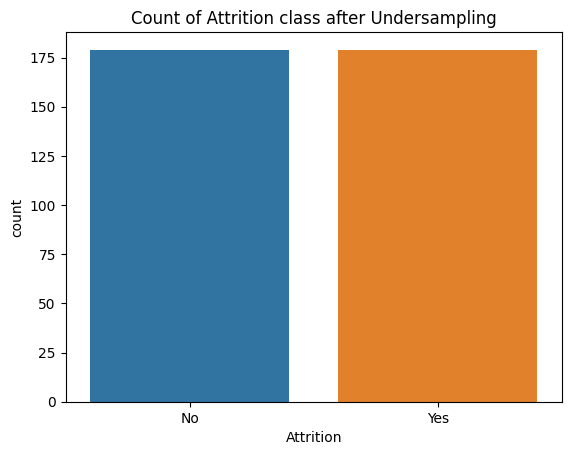

In [118]:
plt.title('Count of Attrition class after Undersampling')
sns.countplot(data=balData, x='Attrition')

In [119]:
X_trainNew = balData.copy()
Y_trainNew = X_trainNew.pop('Attrition')

In [120]:
lr_model2 = LogisticRegression(random_state=1)

In [121]:
lr_model2.fit(X_trainNew, Y_trainNew)

LogisticRegression(random_state=1)

In [122]:
test_pred2 = lr_model2.predict(X_test)

In [123]:
lr_model2.score(X_test,Y_test)

0.673469387755102

In [124]:
confusion_matrix(Y_test, test_pred2)

array([[153,  83],
       [ 13,  45]])

In [125]:
print(classification_report(Y_test, test_pred2))

              precision    recall  f1-score   support

          No       0.92      0.65      0.76       236
         Yes       0.35      0.78      0.48        58

    accuracy                           0.67       294
   macro avg       0.64      0.71      0.62       294
weighted avg       0.81      0.67      0.71       294



In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_model4 = RandomForestClassifier(random_state=1, n_estimators= 500)
# {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [128]:
rf_model4.fit(X_trainNew, Y_trainNew)

RandomForestClassifier(n_estimators=500, random_state=1)

In [129]:
testPred4 = rf_model4.predict(X_test)

In [130]:
rf_model4.score(X_test,Y_test)

0.7482993197278912

In [131]:
print(confusion_matrix(Y_test, testPred4))

[[181  55]
 [ 19  39]]


In [132]:
print(classification_report(Y_test, testPred4))

              precision    recall  f1-score   support

          No       0.91      0.77      0.83       236
         Yes       0.41      0.67      0.51        58

    accuracy                           0.75       294
   macro avg       0.66      0.72      0.67       294
weighted avg       0.81      0.75      0.77       294



In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Instantiate SVM classifier
svm_clf = SVC(kernel='poly')

# Fit the model
svm_clf.fit(X_trainNew, Y_trainNew)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7278911564625851


In [134]:
#?SVC

In [135]:
print(confusion_matrix(Y_test,y_pred))

[[172  64]
 [ 16  42]]


In [136]:
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.73      0.81       236
         Yes       0.40      0.72      0.51        58

    accuracy                           0.73       294
   macro avg       0.66      0.73      0.66       294
weighted avg       0.81      0.73      0.75       294



In [137]:
results = pd.DataFrame() 
results['Actual'] = Y_test 
results['predicted'] = y_pred 
results.head()

,Actual,predicted
1291,Yes,No
1153,Yes,Yes
720,Yes,Yes
763,No,Yes
976,No,Yes


# Oversampling

In [138]:
!pip install smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 38.7 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=d7e90dc074552257204ef8fb7323f0280edb68057412af9e28ee2a390e3b4b7f
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=07f6e2fc6fc9f27e8a5b399e9b5effc43e61678df01bb80c32921f5861743e12
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [139]:
print('Before oversampling count of Yes:', sum(Y_train=='Yes'))
print('Before oversampling count of No:', sum(Y_train=='No'))

Before oversampling count of Yes: 179
Before oversampling count of No: 997


In [140]:
import smote_variants as sv
import numpy as np

In [141]:
oversampler = sv.SMOTE()

In [142]:
# creating new training set
X_train_os, Y_train_os = oversampler.sample(np.array(X_train), np.array(Y_train))

2023-11-16 10:24:33,903:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-11-16 10:24:33,905:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-11-16 10:24:33,909:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-11-16 10:24:33,966:INFO:SMOTE: simplex sampling with n_dim 2


In [143]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_os.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(Y_train_os=='Yes')))
print("After OverSampling, counts of label 'No': {}".format(sum(Y_train_os=='No')))

After OverSampling, the shape of train_X: (1994, 77)
After OverSampling, the shape of train_y: (1994,) 

After OverSampling, counts of label 'Yes': 997
After OverSampling, counts of label 'No': 997


In [144]:
rfModel2 = RandomForestClassifier(random_state=1, n_estimators=500)

In [145]:
rfModel2.fit(X_train_os,Y_train_os)

RandomForestClassifier(n_estimators=500, random_state=1)

In [146]:
testPred4 = rfModel2.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [147]:
rfModel2.score(X_test,Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8435374149659864

In [148]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
confusion_matrix(Y_test,testPred4)

array([[231,   5],
       [ 41,  17]])

In [150]:
print(classification_report(Y_test,testPred4))

              precision    recall  f1-score   support

          No       0.85      0.98      0.91       236
         Yes       0.77      0.29      0.42        58

    accuracy                           0.84       294
   macro avg       0.81      0.64      0.67       294
weighted avg       0.83      0.84      0.81       294



In [151]:
results.sample(n=5)

,Actual,predicted
599,No,No
1213,Yes,Yes
1192,No,No
1384,No,No
979,No,No


# Conclusion: 
Improving our model's performance was achieved through undersampling the training data. The SVM classifier emerged
as the top-performing model, accurately predicting the attrition of over 70% of employees who actually left the organization.

Enhancing the model's performance is a continuous endeavor, and I am convinced that there is more to discover. I encourage you to explore the data and share your insights in this notebook. Collaboratively, we can unleash the complete potential of the model and derive valuable results from it.

Thank you for exploring this notebook! If you enjoyed it and found value in the content, please consider giving it an upvote ⬆️. Your support means a lot to me and encourages me to create more helpful notebooks.